# Wymagane biblioteki

In [1]:
import numpy as np  # Obsługa tablic i operacji matematycznych
import matplotlib.pyplot as plt  # Wyświetlanie obrazów i wykresów

# Funkcje morfologiczne z biblioteki skimage
from skimage.morphology import (binary_dilation, binary_erosion,
                                 binary_opening, binary_closing,
                                 skeletonize, convex_hull_image,
                                 thin)

from skimage.segmentation import find_boundaries  # Detekcja granic obiektów
from skimage.util import invert  # Negacja (odwrócenie) obrazu binarnego
from skimage.data import binary_blobs  # Generowanie przykładowych obrazów binarnych
from scipy.ndimage import distance_transform_edt  # Transformata odległościowa (Euclidean Distance Transform)
from skimage import data, exposure  # Zbiór przykładowych obrazów z biblioteki skimage
from skimage.morphology import disk  # Tworzenie strukturalnych elementów morfologicznych
from skimage import segmentation  # Segmentacja obrazów
from skimage import color  # Konwersje kolorów
from skimage import img_as_ubyte  # Konwersja obrazów do formatu 8-bitowego
from skimage import morphology  # Operacje morfologiczne na obrazach
from skimage import filters  # Filtry obrazów
from skimage import measure  # Pomiar właściwości obiektów na obrazach

# 1. Obraz binarny testowy

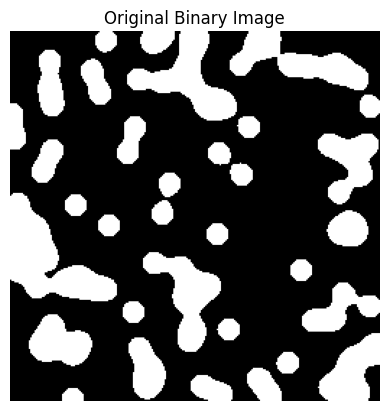

In [2]:
#Wygeneruj syntetyczny obraz binarny o losowych kształtach
image = binary_blobs(length=256, blob_size_fraction=0.1, n_dim=2, volume_fraction=0.3)

# Wyświetl obraz
plt.imshow(image, cmap='gray')
plt.title("Original Binary Image")
plt.axis('off')
plt.show()

# 2. Dylacja i Erozja

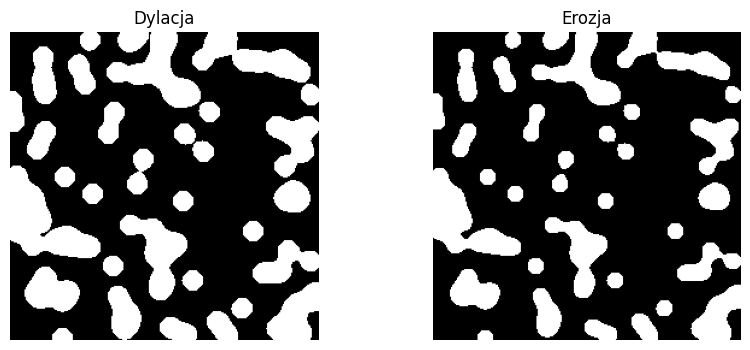

In [3]:
# Zastosuj dylację – rozszerzenie obiektów
dilated = binary_dilation(image)

# Zastosuj erozję – skurczenie obiektów
eroded = binary_erosion(image)

# Wyświetl efekty obok siebie
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(dilated, cmap='gray')
axes[0].set_title("Dylacja")  # Rozrost obiektów
axes[1].imshow(eroded, cmap='gray')
axes[1].set_title("Erozja")  # Skurczenie obiektów
for ax in axes:
    ax.axis('off')
plt.show()

# 3. Otwarcie i Zamknięcie

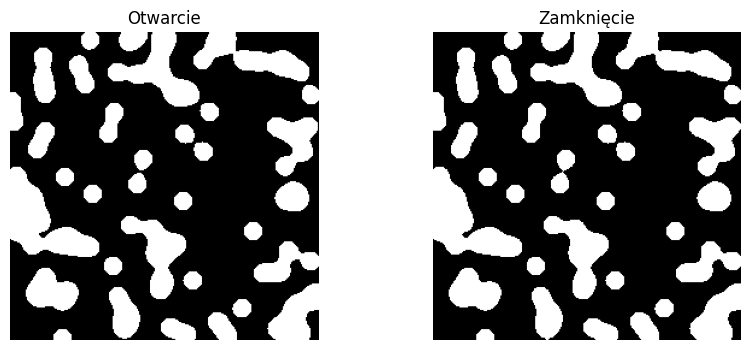

In [4]:
# Otwarcie: erozja + dylacja — usuwa drobne obiekty
opened = binary_opening(image)

# Zamknięcie: dylacja + erozja — wypełnia małe dziury
closed = binary_closing(image)

# Wyświetl wyniki
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(opened, cmap='gray')
axes[0].set_title("Otwarcie")
axes[1].imshow(closed, cmap='gray')
axes[1].set_title("Zamknięcie")
for ax in axes:
    ax.axis('off')
plt.show()

# 4. Granice obiektu

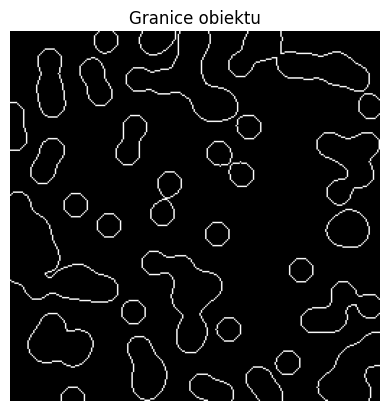

In [5]:
# Wyodrębnij zewnętrzne granice obiektów
boundaries = find_boundaries(image, mode='outer')

# Wyświetl granice
plt.imshow(boundaries, cmap='gray')
plt.title("Granice obiektu")
plt.axis('off')
plt.show()

# 5. Szkielet (Skeletonization)

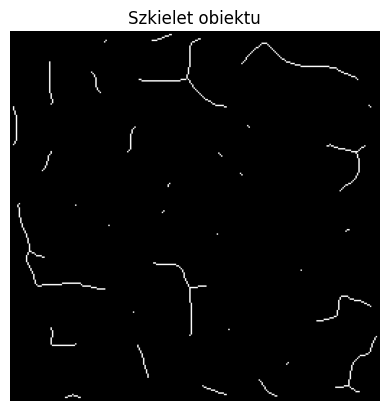

In [6]:
# Wygeneruj szkielet binarny obiektu (linia przechodząca przez środek)
skeleton = skeletonize(image)

# Wyświetl szkielet
plt.imshow(skeleton, cmap='gray')
plt.title("Szkielet obiektu")
plt.axis('off')
plt.show()

# 6. Ścienianie (Thinning)

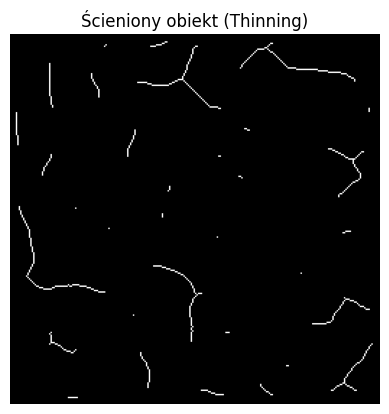

In [7]:
# Zastosuj operację ścieniania — zmniejsza grubość obiektów do jednej linii
thinned = thin(image)

# Wyświetl wynik
plt.imshow(thinned, cmap='gray')
plt.title("Ścieniony obiekt (Thinning)")
plt.axis('off')
plt.show()

# 7. Pogrubianie (Fattening) – symulacja

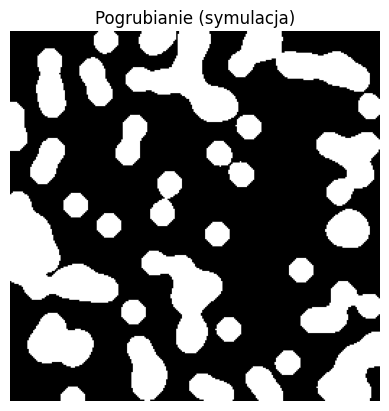

In [8]:
# Symulacja pogrubiania: dodanie pikseli przez logikę OR z dylacją
thickened = image | binary_dilation(image)

# Wyświetl efekt pogrubienia
plt.imshow(thickened, cmap='gray')
plt.title("Pogrubianie (symulacja)")
plt.axis('off')
plt.show()

# 9. Operacja Hit-or-Miss – wykrywanie wzorców

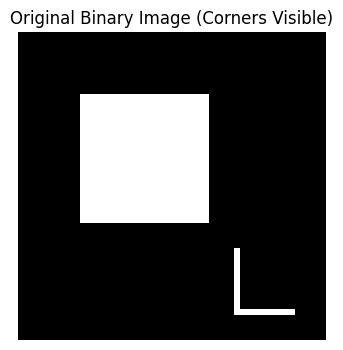

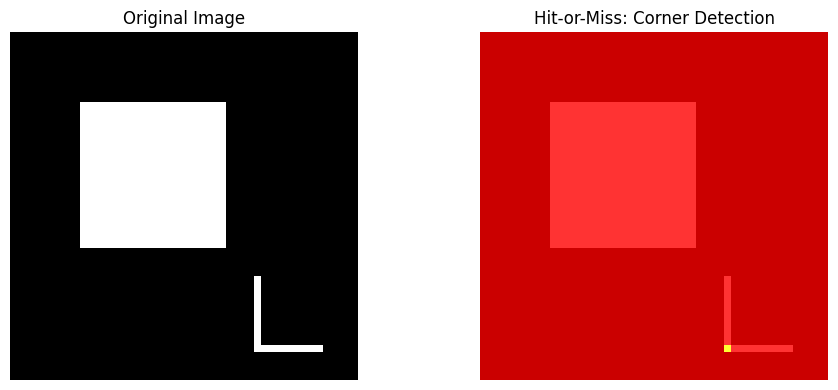

In [9]:
# ===============================================
# Import wymaganych bibliotek
# ===============================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_hit_or_miss
from skimage.draw import rectangle

# ===============================================
# 1. Tworzymy obraz testowy z wyraźnymi narożnikami
# ===============================================

# Pusty obraz binarny
image = np.zeros((50, 50), dtype=bool)

# Dodajemy kwadrat – wyraźne cztery rogi
rr, cc = rectangle(start=(10, 10), end=(30, 30))
image[rr, cc] = True

# Dodajemy literę "L" w prawym dolnym rogu
image[35:45, 35] = True  # pionowa kreska
image[45, 35:45] = True  # pozioma kreska

# Wyświetlamy oryginalny obraz
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title("Original Binary Image (Corners Visible)")
plt.axis('off')
plt.show()

# ===============================================
# 2. Definiujemy wzorce (elementy strukturalne)
# ===============================================

# Operacja Hit-or-Miss wykrywa określony układ pikseli.
# Poniżej definiujemy wzorce dla 4 typów rogów ("L" w różnych orientacjach).

# Narożnik górny-lewy
se_tl_1 = np.array([[0, 0, 0],
                    [0, 1, 1],
                    [0, 1, 0]])
se_tl_2 = np.array([[1, 1, 1],
                    [1, 0, 0],
                    [1, 0, 1]])

# Narożnik górny-prawy
se_tr_1 = np.rot90(se_tl_1, 1)
se_tr_2 = np.rot90(se_tl_2, 1)

# Narożnik dolny-prawy
se_br_1 = np.rot90(se_tl_1, 2)
se_br_2 = np.rot90(se_tl_2, 2)

# Narożnik dolny-lewy
se_bl_1 = np.rot90(se_tl_1, 3)
se_bl_2 = np.rot90(se_tl_2, 3)

# ===============================================
# 3. Wykonujemy operacje Hit-or-Miss dla każdego wzorca
# ===============================================

hit_tl = binary_hit_or_miss(image, structure1=se_tl_1, structure2=se_tl_2)
hit_tr = binary_hit_or_miss(image, structure1=se_tr_1, structure2=se_tr_2)
hit_br = binary_hit_or_miss(image, structure1=se_br_1, structure2=se_br_2)
hit_bl = binary_hit_or_miss(image, structure1=se_bl_1, structure2=se_bl_2)

# Sumujemy wszystkie wyniki, aby uzyskać pełną mapę narożników
corners = hit_tl | hit_tr | hit_br | hit_bl

# ===============================================
# 4. Wizualizacja wyników
# ===============================================

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Obraz oryginalny
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

# Obraz z wykrytymi narożnikami (nałożone czerwone punkty)
axs[1].imshow(image, cmap='gray')
axs[1].imshow(corners, cmap='autumn', alpha=0.8)
axs[1].set_title("Hit-or-Miss: Corner Detection")
axs[1].axis('off')

plt.tight_layout()
plt.show()

## Dlaczego widzisz żółty punkt tylko w jednym miejscu (na literze “L”), mimo że kwadrat też ma przecież rogi?

# Hit and miss: Poprawiony kod – działa na wszystkich rogach

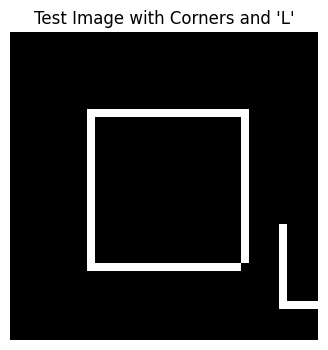

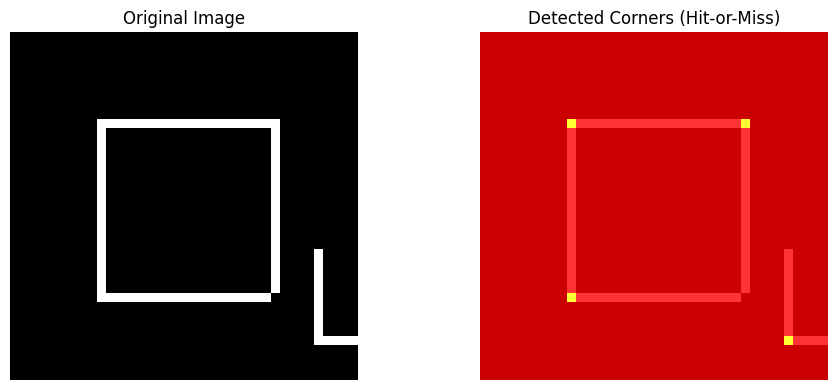

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_hit_or_miss

# ===============================================
# 1. Tworzymy obraz z ramką (pusty kwadrat)
# ===============================================

image = np.zeros((40, 40), dtype=bool)

# Ramka kwadratu
image[10, 10:30] = True   # górna krawędź
image[30, 10:30] = True   # dolna krawędź
image[10:30, 10] = True   # lewa krawędź
image[10:30, 30] = True   # prawa krawędź

# Dodajemy literę "L" w prawym dolnym rogu dla porównania
image[25:35, 35] = True   # pionowa kreska
image[35, 35:45] = True   # pozioma kreska

plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title("Test Image with Corners and 'L'")
plt.axis('off')
plt.show()

# ===============================================
# 2. Definicje wzorców narożników "L"
# ===============================================

# Narożnik górny-lewy
se_tl_1 = np.array([[0, 0, 0],
                    [0, 1, 1],
                    [0, 1, 0]])
se_tl_2 = np.array([[1, 1, 1],
                    [1, 0, 0],
                    [1, 0, 1]])

# Obracamy wzorce w 4 kierunki
se_tr_1 = np.rot90(se_tl_1, 1); se_tr_2 = np.rot90(se_tl_2, 1)
se_br_1 = np.rot90(se_tl_1, 2); se_br_2 = np.rot90(se_tl_2, 2)
se_bl_1 = np.rot90(se_tl_1, 3); se_bl_2 = np.rot90(se_tl_2, 3)

# ===============================================
# 3. Wykrywanie rogów w 4 kierunkach
# ===============================================

hit_tl = binary_hit_or_miss(image, structure1=se_tl_1, structure2=se_tl_2)
hit_tr = binary_hit_or_miss(image, structure1=se_tr_1, structure2=se_tr_2)
hit_br = binary_hit_or_miss(image, structure1=se_br_1, structure2=se_br_2)
hit_bl = binary_hit_or_miss(image, structure1=se_bl_1, structure2=se_bl_2)

# Sumujemy wyniki z różnych kierunków
corners = hit_tl | hit_tr | hit_br | hit_bl

# ===============================================
# 4. Wizualizacja wyników
# ===============================================

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(image, cmap='gray')
axs[1].imshow(corners, cmap='autumn', alpha=0.8)
axs[1].set_title("Detected Corners (Hit-or-Miss)")
axs[1].axis('off')

plt.tight_layout()
plt.show()

# 10. Wypukła otoczka (Convex Hull)

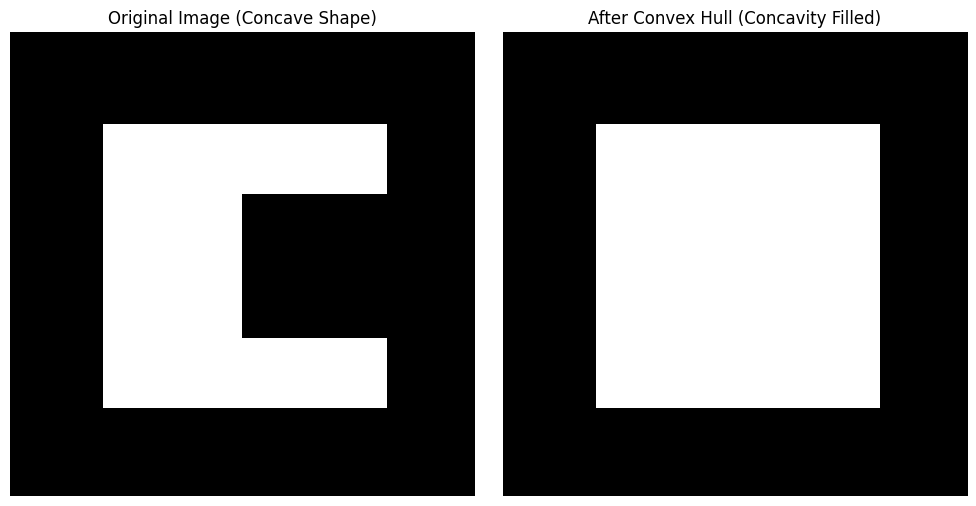

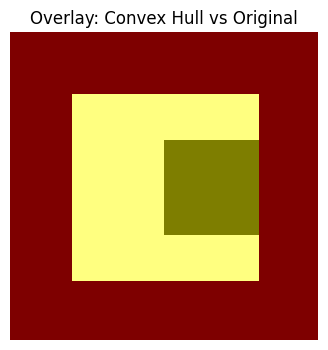

In [11]:
# Import wymaganych bibliotek
import numpy as np                      # Do pracy na tablicach numerycznych
import matplotlib.pyplot as plt          # Do wizualizacji wyników
from skimage.morphology import convex_hull_image  # Funkcja do obliczania wypukłej otoczki
from skimage.draw import rectangle       # Pomoc do rysowania prostokątów

# ===============================================
# 1. Tworzymy obraz testowy – obiekt z wklęsłością
# ===============================================

# Tworzymy pusty obraz 100x100 pikseli (czarne tło)
image = np.zeros((100, 100), dtype=bool)

# Dodajemy duży biały prostokąt – główne ciało obiektu
rr, cc = rectangle(start=(20, 20), end=(80, 80))
image[rr, cc] = True

# Wycinamy fragment środka, żeby powstała "wklęsłość" – np. litera "C"
rr_hole, cc_hole = rectangle(start=(35, 50), end=(65, 80))
image[rr_hole, cc_hole] = False

# ===============================================
# 2. Obliczamy wypukłą otoczkę (Convex Hull)
# ===============================================

# Funkcja convex_hull_image() zwraca najmniejszy wypukły kształt,
# który całkowicie obejmuje obiekt wejściowy.
convex_hull = convex_hull_image(image)

# ===============================================
# 3. Wizualizacja wyniku
# ===============================================

# Tworzymy dwa obrazy obok siebie: oryginał i jego otoczkę
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# (a) Obraz oryginalny
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image (Concave Shape)")  # Widać „wklęsłość”
axs[0].axis('off')

# (b) Obraz po zastosowaniu Convex Hull
axs[1].imshow(convex_hull, cmap='gray')
axs[1].set_title("After Convex Hull (Concavity Filled)")  # Wklęsłość została wypełniona
axs[1].axis('off')

plt.tight_layout()
plt.show()

# ===============================================
# 4. Analiza wyniku
# ===============================================

# Dla lepszej wizualizacji różnic — nałóżmy wynik otoczki na oryginał
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')               # oryginał jako tło
plt.imshow(convex_hull, cmap='autumn', alpha=0.5)  # otoczka w półprzezroczystym kolorze
plt.title("Overlay: Convex Hull vs Original")
plt.axis('off')
plt.show()

In [19]:
def show_gray_images(images, titles):
    fig, axes = plt.subplots(1, len(images))
    fig.set_size_inches(5*len(images), 5)
    for ax, im, tt in zip(np.atleast_1d(axes), images, titles):
        ax.imshow(im, cmap='gray')
        ax.axis("off")
        ax.set_title(tt)
    plt.show()

## Zadanie 1. Analiza mikroskopowego obrazu komórek / ziaren pyłku

Celem zadania jest przećwiczenie podstawowych operacji morfologicznych na realistycznym obrazie mikroskopowym komórek, w tym:

* poprawy kontrastu,
* ręcznego progowania,
* filtracji szumów i wypełniania obiektów,
* wyodrębnienia granic komórek.

Student powinien zrozumieć, jak kolejne kroki przetwarzania obrazu wpływają na jakość segmentacji.

Opis zadania

Używając biblioteki scikit-image, wykonaj kompletny proces segmentacji komórek z przykładowego obrazu mikroskopowego data.cells3d().


---



## Etapy, które należy zrealizować:

# 1. Wczytanie obrazu mikroskopowego:

* **Użyj danych wbudowanych w skimage.data.cells3d().**
* **Wybierz jeden kanał (np. jądrowy) i jedną warstwę obrazu 3D.**

Funkcja skimage.data.cells3d() zwraca trójwymiarowy obraz mikroskopowy komórek (3D image stack), pochodzący z mikroskopii konfokalnej.
Dane te są dostępne w bibliotece scikit-image jako przykładowy zestaw danych biologicznych.

Obraz ma cztery wymiary: shape = (Z, Channels, Y, X)

czyli:

Z – liczba warstw (głębokość, kolejne przekroje 3D),
Channels – różne kanały barwne / fluorescencyjne (np. DNA, błony komórkowe),
Y – wysokość obrazu (liczba wierszy),
X – szerokość obrazu (liczba kolumn).

Co robi linijka: image_gray = data.cells3d()[:, 1, :, :]
Znaczenie poszczególnych indeksów:

* : → pobiera wszystkie warstwy (Z)
* 1 → wybiera kanał nr 1 (drugi kanał, tzw. nuclear channel)
* :, : → pobiera wszystkie piksele w wymiarach Y i X

Efekt:

Otrzymujemy trójwymiarowy obraz (Z × Y × X) pokazujący rozkład fluorescencji jądrowej komórek.

Dlaczego kanał 1?

- Kanał 0 w cells3d() odpowiada barwieniu błon komórkowych,
- Kanał 1 – barwieniu jąder komórkowych (DNA),
czyli tego, co najczęściej analizujemy w segmentacji biologicznej.

image_gray = image_gray[30]
Ten krok wybiera jedną warstwę (Z-slice) z trójwymiarowego stosu obrazów. Wartość 30 to po prostu numer przekroju (można użyć innego, np. 10, 20, 40...). Wynikiem jest obraz 2D, który można łatwo wyświetlić i analizować za pomocą morfologii.

* **Wyświetl obraz w skali szarości.**

# 2. Poprawa Kontrastu

Użyj funkcji exposure.equalize_hist() w celu wyrównania histogramu jasności.

* Porównaj obraz przed i po poprawie kontrastu.
* Wyjaśnij, dlaczego ten krok ułatwia dalsze progowanie.

# 3. Ręczne progowanie

* Dobierz ręcznie wartość progu (threshold_value), np. 0.3–0.5.
* Zastosuj maskę binarną, gdzie True odpowiada obiektom (komórkom).
* Zbadaj, jak zmiana progu wpływa na liczbę i kształt wykrytych komórek.

# 4.Otwarcie morfologiczne (Opening)

* Użyj morphology.binary_opening() z elementem strukturalnym disk(2).
* Usuń drobny szum i małe artefakty z binarnego obrazu.
* Zobrazuj efekt tej operacji.

# 5.Zamknięcie morfologiczne (Closing)

* Zastosuj morphology.binary_closing() z elementem disk(3).
* Wypełnij małe dziury wewnątrz komórek i wygładź ich krawędzie.
* Porównaj wynik z obrazem po otwarciu.

# 6.Wyodrębnienie granic komórek

* Użyj segmentation.find_boundaries() do detekcji krawędzi obiektów.
* Nałóż kontury komórek na obraz w skali szarości, aby zwizualizować efekt segmentacji.
* Wizualizacja etapów przetwarzania
* Utwórz zestawienie wszystkich etapów w postaci siatki obrazów (2×3).
* Dodaj tytuły dla każdego etapu, np.:

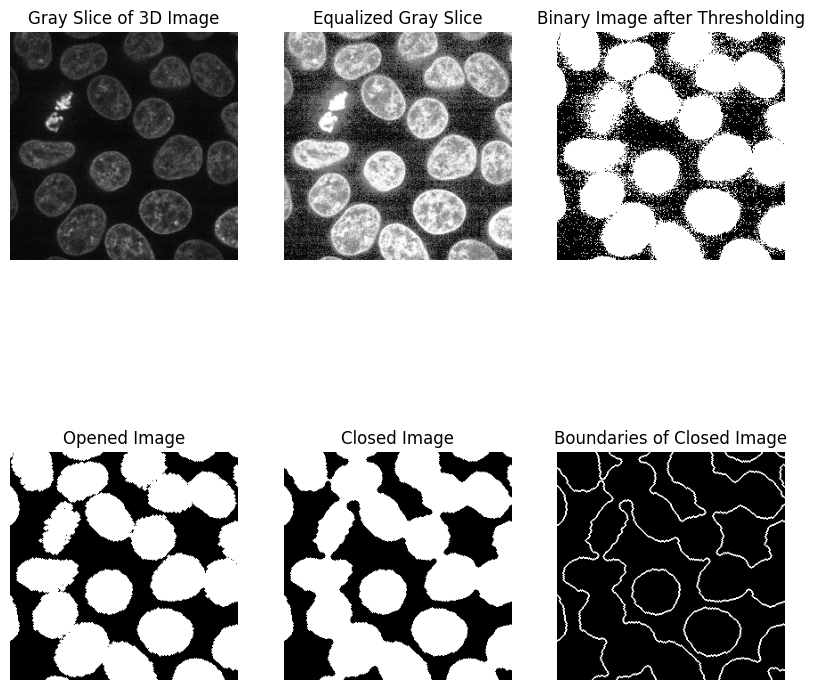

In [12]:
image = data.cells3d()
image_slice = image[30, :, :, :]
image_gray = image_slice[1, :, :]

equalized_image = exposure.equalize_hist(image_gray)

thereshold_value = 0.35
binary_image = equalized_image > thereshold_value

opened_image = binary_opening(binary_image, disk(2))

closed_image = binary_closing(opened_image, disk(3))

boundared_image = segmentation.find_boundaries(closed_image, mode='thick')

fig, ax = plt.subplots(2, 3, figsize=(10, 10))
ax[0, 0].imshow(image_gray, cmap='gray')
ax[0, 0].set_title("Gray Slice of 3D Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(equalized_image, cmap='gray')
ax[0, 1].set_title("Equalized Gray Slice")
ax[0, 1].axis('off')

ax[0, 2].imshow(binary_image, cmap='gray')
ax[0, 2].set_title("Binary Image after Thresholding")
ax[0, 2].axis('off')

ax[1, 0].imshow(opened_image, cmap='gray')
ax[1, 0].set_title("Opened Image")
ax[1, 0].axis('off')

ax[1, 1].imshow(closed_image, cmap='gray')
ax[1, 1].set_title("Closed Image")
ax[1, 1].axis('off')

ax[1, 2].imshow(boundared_image, cmap='gray')
ax[1, 2].set_title("Boundaries of Closed Image")
ax[1, 2].axis('off')

plt.show()


## Zadanie 2. Analiza kształtu obiektów z użyciem wypukłej otoczki (Convex Hull)
Celem zadania jest zrozumienie działania operacji wypukłej otoczki (Convex Hull) i jej wykorzystania do:

* opisu kształtu obiektów,
* wykrywania wklęsłości,
* porównania rzeczywistego kształtu z jego wypukłym przybliżeniem.

Student nauczy się, jak zastosować Convex Hull do prostych analiz geometrycznych na obrazach binarnych.


---



Opis problemu

Dany jest obraz przedstawiający obiekty o nieregularnych kształtach (np. komórki, ziarna piasku lub krople cieczy).
Celem jest:

* Oczyszczenie obrazu,
* Zastosowanie operacji Convex Hull dla każdego obiektu,
* Porównanie oryginalnych kształtów z ich otoczkami,
* Obliczenie miary „wklęsłości” obiektu, czyli różnicy między jego polem a polem jego wypukłej otoczki.


---



# Etapy projektu
**1. Wczytanie obrazu**

* Użyj wbudowanego obrazu skimage.data.coins() lub własnego binarnego zdjęcia z wyraźnymi obiektami (np. nasionami, liśćmi, pęcherzykami).
* Jeśli obraz jest w skali szarości – przekształć go w binarny przez progowanie.

**2.Czyszczenie obrazu**

* Usuń drobne zakłócenia za pomocą otwarcia i zamknięcia morfologicznego.

**3.Wykorzystanie Convex Hull**

* Dla każdego obiektu (etykiety) oblicz jego wypukłą otoczkę.
* Porównaj oryginalny kształt i jego wypukłe przybliżenie.

**4.Obliczenie miary wklęsłości**

* Dla każdego obiektu oblicz:
* pole oryginalnego obiektu,
* pole jego wypukłej otoczki,
* stosunek Concavity = (A_hull - A_object) / A_hull.

**5.Wizualizacja różnic (różnica pomiędzy obiektem a otoczką)**

* Wyświetl piksele, które należą do otoczki, ale nie do oryginalnego obiektu (czyli „wklęsłe fragmenty”).

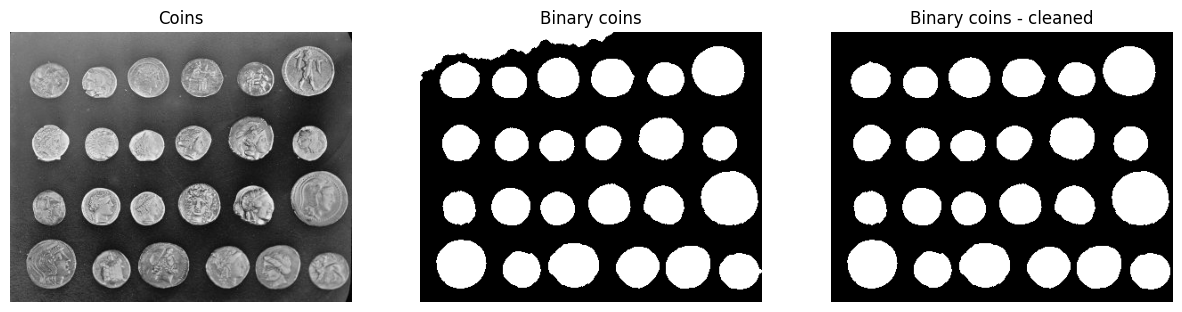

In [ ]:
from skimage.data import coins

coins_img = coins() / 256
threshold = .46
bin_coins = np.where(coins_img > threshold, 1, 0)
bin_coins = binary_closing(bin_coins, disk(3))
bin_coins = binary_opening(bin_coins, disk(2))
# clean top left
bin_coins_cleaned = np.copy(bin_coins)
bin_coins_cleaned[:25,:250] = 0
bin_coins_cleaned[:33,:100] = 0
bin_coins_cleaned[:45,:25] = 0
bin_coins_cleaned[:65,:15] = 0
# seperate bottom right coin from the border
bin_coins_cleaned[:,-3:] = 0

show_gray_images([coins_img, bin_coins, bin_coins_cleaned], ["Coins", "Binary coins", "Binary coins - cleaned"])

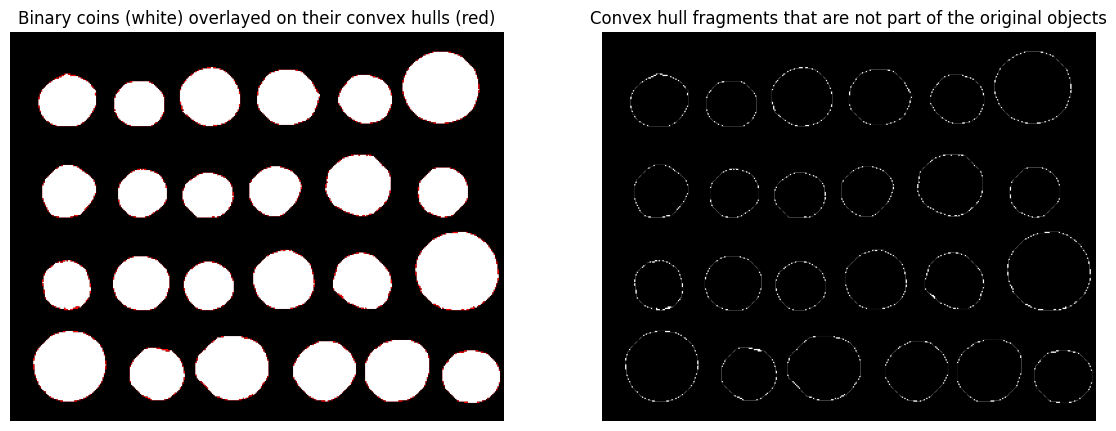

In [22]:
from skimage.measure import label, regionprops
from matplotlib.colors import LinearSegmentedColormap


labeled = label(bin_coins_cleaned)
convex_mask = np.zeros_like(bin_coins_cleaned, dtype=bool)

hulls = list()
for region in regionprops(labeled):
    hull = convex_hull_image(region.image)
    hulls.append(hull)
    minr, minc, maxr, maxc = region.bbox
    convex_mask[minr:maxr, minc:maxc] |= hull

cmap_red = LinearSegmentedColormap.from_list("red", ["#000000", "#ff0000"])
cmap_alpha_white = LinearSegmentedColormap.from_list("alpha_white", ["#00000000", "#ffffff"])
cmap_alpha_black = LinearSegmentedColormap.from_list("alpha_black", ["#00000000", "#000000"])

fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_size_inches(14, 7)

cmap_alpha_red = LinearSegmentedColormap.from_list("red", ["#00000000", "#ff0000"])

ax1.imshow(convex_mask, cmap=cmap_red)
ax1.imshow(bin_coins_cleaned, cmap=cmap_alpha_white)
ax1.axis("off")
ax1.set_title("Binary coins (white) overlayed on their convex hulls (red)")

ax2.imshow(convex_mask, cmap='gray')
ax2.imshow(bin_coins_cleaned, cmap=cmap_alpha_black)
ax2.axis("off")
ax2.set_title("Convex hull fragments that are not part of the original objects")

plt.show()

Concavity mean: 0.022617
Concavity median: 0.0215237


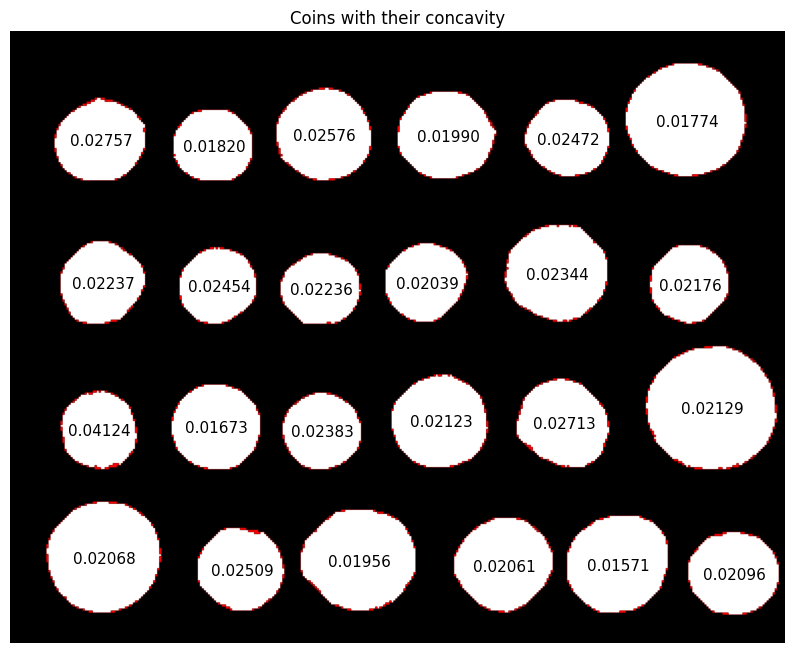

In [23]:
plt.figure(figsize = (10,10))
plt.imshow(convex_mask, cmap=cmap_red)
plt.imshow(bin_coins_cleaned, cmap=cmap_alpha_white)

concs = list()
for coin, hull in zip(regionprops(labeled), hulls):
    coin_area = np.sum(coin.image)
    hull_area = np.sum(hull)
    conc = (hull_area-coin_area) / hull_area
    concs.append(conc)
    y1, x1, y2, x2 = coin.bbox
    plt.text((x1+x2)/2, (y1+y2)/2, f"{conc:.5f}", fontsize=11, horizontalalignment='center', verticalalignment='center')

print(f"Concavity mean: {np.mean(concs):.6}")
print(f"Concavity median: {np.median(concs):.6}")

plt.axis("off")
plt.title("Coins with their concavity")
plt.show()